Referência: https://smolski.github.io/livroavancado/analisf.html

Carregar dependências

In [1]:
library(scales)
library(data.table)
library(corrplot)

corrplot 0.84 loaded


Baixar base

In [2]:
url <- "https://raw.githubusercontent.com/Lucas-MDC/MetodosQuantitativos/master/base_traduzida.csv"
destfile <- "base.csv"
curl::curl_download(url, destfile)
base <- read.csv(destfile)

Renomar colunas (tirar caracteres especiais)

In [3]:
names(base)[names(base) == "PreÃ.o_do_Produto"] <- "Preco_do_Produto"
names(base)[names(base) == "MÃ.dia_da_Nota_do_Produto"] <- "Media_da_Nota_do_Produto"
names(base)[names(base) == "Quantidade_de_AvaliaÃ.Ãµes"] <- "Quantidade_de_Avaliacoes"
names(base)[names(base) == "PreÃ.o_de_Varejo"] <- "Preco_de_Varejo"
names(base)[names(base) == "MÃ.dia_de_Nota_do_Vendedor"] <- "Media_de_Nota_do_Vendedor"
names(base)[names(base) == "Quantidade_de_AvaliaÃ.Ãµes_do_Vendedor"] <- "Quantidade_de_Avaliacoes_do_Vendedor"

attach(base)

Fazer a normalização das variáveis para uma escala

v1 = Preço do produto<br/>
v2 = Unidades vendidas<br/>
v3 = Média da nota do produto<br/>
v4 = Quantidade de avaliações<br/>
v5 = Preço do varejo<br/>
v6 = Média de nota do vendedor<br/>
v7 = Quantidade de avaliações do vendedor

In [4]:
# Base com escala
base_e <- data.table(v1 = rescale(base$Preco_do_Produto),
                     v2 = rescale(base$Unidades_Vendidas),
                     v3 = rescale(base$Media_da_Nota_do_Produto),
                     v4 = rescale(base$Quantidade_de_Avaliacoes),
                     v5 = rescale(base$Preco_de_Varejo),
                     v6 = rescale(base$Media_de_Nota_do_Vendedor),
                     v7 = rescale(base$Quantidade_de_Avaliacoes_do_Vendedor))

### Construção da Matriz de Correlação

In [5]:
matriz_correlacao <- cor(base_e)
print(matriz_correlacao, digits = 2)

        v1     v2    v3      v4    v5    v6     v7
v1  1.0000 -0.025 0.053 -0.0019 0.305 0.047 -0.024
v2 -0.0248  1.000 0.039  0.8995 0.013 0.123  0.273
v3  0.0535  0.039 1.000  0.0541 0.024 0.237  0.034
v4 -0.0019  0.899 0.054  1.0000 0.054 0.141  0.258
v5  0.3047  0.013 0.024  0.0539 1.000 0.054  0.029
v6  0.0471  0.123 0.237  0.1413 0.054 1.000  0.136
v7 -0.0238  0.273 0.034  0.2582 0.029 0.136  1.000


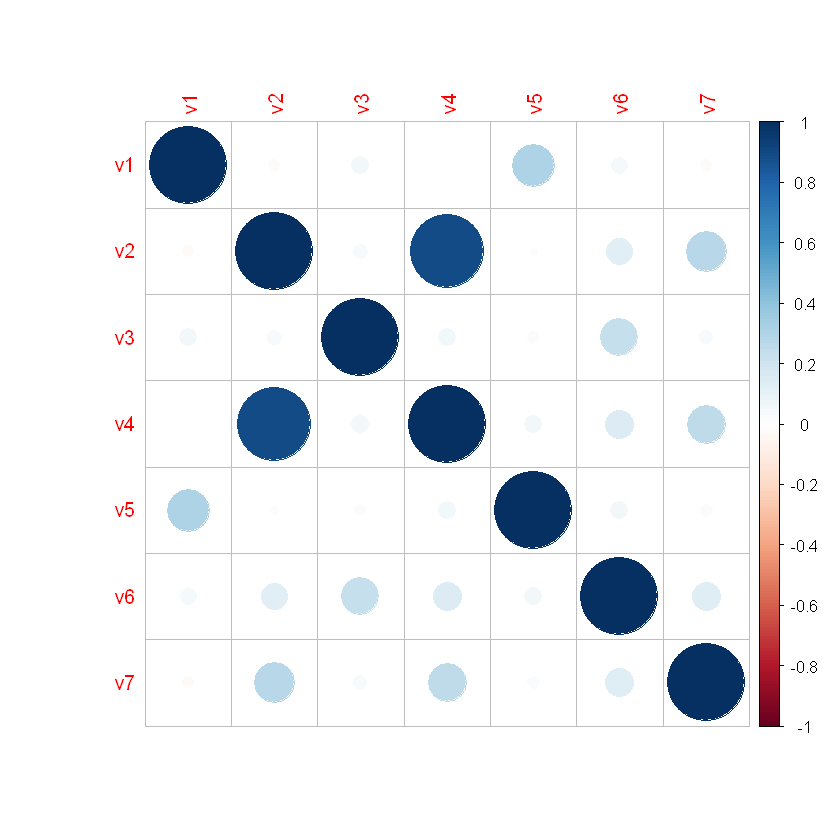

In [6]:
corrplot(matriz_correlacao, method="circle")

Para testar a conveniência do modelo fatorial pode-se aplicar o teste de esfericidade de Bartlett para testar a hipótese nula, de que as variáveis não sejam correlacionadas na população. Um valor elevado da estatística de teste favorece a rejeição da hipótese nula.

Também, a medida de adequacidade da amostra de Kaiser-Meyer-Olkin (KMO) compara as magnitudes dos coeficientes de correlação observados com as magnitudes dos coeficientes de correlação parcial. Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.

Hipóteses:

H0: A matriz de correlação da população é uma matriz identidade, ou seja as variáveis não são correlacionadas na população.
H1: A matriz de correlação da população não é uma matriz identidade, ou seja as variáveis são correlacionadas na população.

In [7]:
library(psych)
cortest.bartlett(base_e)


Attaching package: 'psych'

The following objects are masked from 'package:scales':

    alpha, rescale

R was not square, finding R from data


$chisq
[1] 3042.441

$p.value
[1] 0

$df
[1] 21

**Interpretação da KMO**

In [8]:
KMO(base_e)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = base_e)
Overall MSA =  0.54
MSA for each item = 
  v1   v2   v3   v4   v5   v6   v7 
0.51 0.53 0.54 0.53 0.49 0.63 0.88 

A estatística KMO maior que 0,5 também concorda quanto ao fato de que a análise fatorial pode ser considerada uma técnica apropriada para analisar a matriz de correlação.

Apesar disso, o valor de KMA médio é bem próximo, de 0,5, indicativo de que a análise poderá ser bem regular

### Análise Fatorial

In [9]:
fit<-princomp(base_e,cor=TRUE)
fit

Call:
princomp(x = base_e, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7 
1.4488740 1.1606517 1.0736578 0.9348150 0.8599058 0.8297153 0.3149067 

 7  variables and  1573 observations.

In [10]:
summary(fit)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     1.4488740 1.1606517 1.0736578 0.9348150 0.8599058
Proportion of Variance 0.2998908 0.1924446 0.1646773 0.1248399 0.1056340
Cumulative Proportion  0.2998908 0.4923355 0.6570128 0.7818526 0.8874866
                           Comp.6     Comp.7
Standard deviation     0.82971530 0.31490674
Proportion of Variance 0.09834678 0.01416661
Cumulative Proportion  0.98583339 1.00000000

A função summary(fit) mostra a aplicação da análise de componentes principais. O fator 1 responde por 29,98% da variância total. Da mesma forma, o segundo fator responde por 19,24% da variância total, sendo que os dois primeiros fatores respondem por 49,23% da variância total. Várias considerações devem integrar a análise do número de fatores que devem ser usados na análise.

Aqui vou usar o screeplot pra determinar a quantidade de fatores

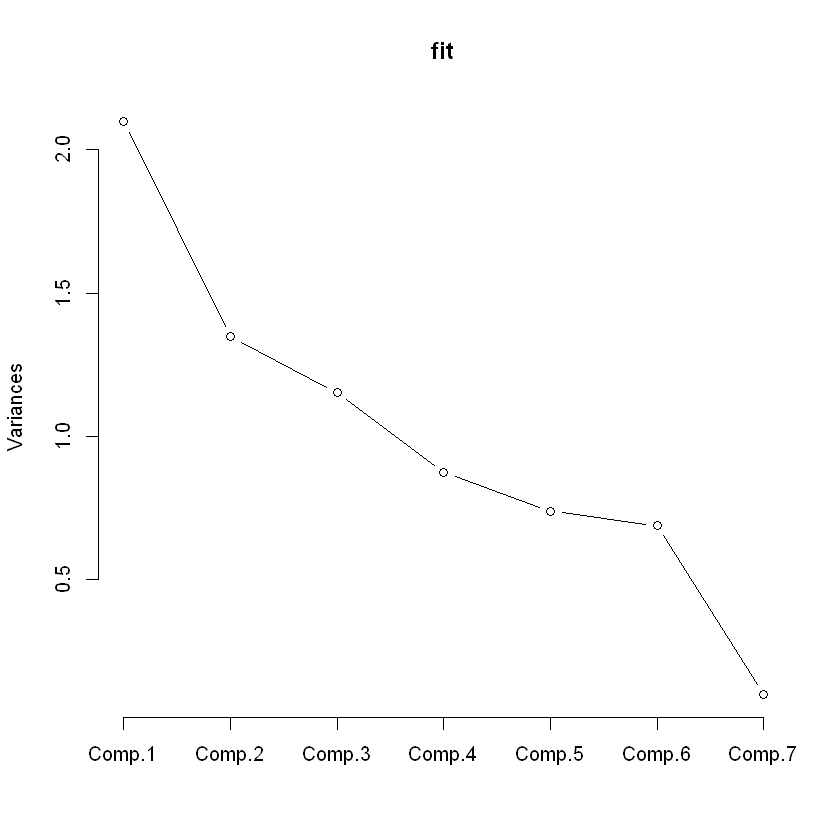

In [11]:
screeplot(fit,type="lines")

Como não é muito significativo, vou definir uma % total explicada acima de 60%, que serão **3** fatores.

### Análise do ACP

In [12]:
ACP_base<-principal(base_e, nfactors=3,
                n.obs=1000,rotate="none", scores=TRUE)
ACP_base

Principal Components Analysis
Call: principal(r = base_e, nfactors = 3, rotate = "none", n.obs = 1000, 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
    PC1   PC2   PC3   h2    u2 com
v1 0.01  0.74 -0.33 0.65 0.347 1.4
v2 0.92 -0.16 -0.17 0.91 0.094 1.1
v3 0.17  0.37  0.68 0.63 0.369 1.7
v4 0.93 -0.11 -0.17 0.90 0.100 1.1
v5 0.09  0.71 -0.39 0.66 0.344 1.6
v6 0.32  0.36  0.61 0.60 0.399 2.2
v7 0.49 -0.02  0.08 0.25 0.748 1.1

                       PC1  PC2  PC3
SS loadings           2.10 1.35 1.15
Proportion Var        0.30 0.19 0.16
Cumulative Var        0.30 0.49 0.66
Proportion Explained  0.46 0.29 0.25
Cumulative Proportion 0.46 0.75 1.00

Mean item complexity =  1.4
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.13 
 with the empirical chi square  1072.99  with prob <  2.6e-232 

Fit based upon off diagonal values = 0.71

### Análise do ACP (com rotação)

In [13]:
ACP_base_rotacao<-principal(base_e, nfactors=3,
                n.obs=1000,rotate="varimax", scores=TRUE)
ACP_base_rotacao

Principal Components Analysis
Call: principal(r = base_e, nfactors = 3, rotate = "varimax", n.obs = 1000, 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
     RC1   RC2   RC3   h2    u2 com
v1 -0.05  0.80  0.05 0.65 0.347 1.0
v2  0.95  0.00 -0.01 0.91 0.094 1.0
v3 -0.01  0.01  0.79 0.63 0.369 1.0
v4  0.95  0.04  0.01 0.90 0.100 1.0
v5  0.04  0.81  0.00 0.66 0.344 1.0
v6  0.16  0.05  0.76 0.60 0.399 1.1
v7  0.47 -0.03  0.17 0.25 0.748 1.3

                       RC1  RC2  RC3
SS loadings           2.06 1.31 1.24
Proportion Var        0.29 0.19 0.18
Cumulative Var        0.29 0.48 0.66
Proportion Explained  0.45 0.28 0.27
Cumulative Proportion 0.45 0.73 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.13 
 with the empirical chi square  1072.99  with prob <  2.6e-232 

Fit based upon off diagonal values = 0.71

### Autovalores

In [14]:
ACP_base_rotacao$values

[1] 2.09923587 1.34711246 1.15274098 0.87387900 0.73943797 0.68842747 0.09916626

In [15]:
ACP_base_rotacao$loadings


Loadings:
   RC1    RC2    RC3   
v1         0.805       
v2  0.952              
v3                0.794
v4  0.948              
v5         0.809       
v6  0.161         0.757
v7  0.471         0.172

                 RC1   RC2   RC3
SS loadings    2.056 1.306 1.237
Proportion Var 0.294 0.187 0.177
Cumulative Var 0.294 0.480 0.657

In [16]:
ACP_base_rotacao

Principal Components Analysis
Call: principal(r = base_e, nfactors = 3, rotate = "varimax", n.obs = 1000, 
    scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
     RC1   RC2   RC3   h2    u2 com
v1 -0.05  0.80  0.05 0.65 0.347 1.0
v2  0.95  0.00 -0.01 0.91 0.094 1.0
v3 -0.01  0.01  0.79 0.63 0.369 1.0
v4  0.95  0.04  0.01 0.90 0.100 1.0
v5  0.04  0.81  0.00 0.66 0.344 1.0
v6  0.16  0.05  0.76 0.60 0.399 1.1
v7  0.47 -0.03  0.17 0.25 0.748 1.3

                       RC1  RC2  RC3
SS loadings           2.06 1.31 1.24
Proportion Var        0.29 0.19 0.18
Cumulative Var        0.29 0.48 0.66
Proportion Explained  0.45 0.28 0.27
Cumulative Proportion 0.45 0.73 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.13 
 with the empirical chi square  1072.99  with prob <  2.6e-232 

Fit based upon off diagonal values = 0.71

O Fator 1 tem altos coeficientes para: 
- v2: Unidades vendidas
- v4: Quantidade de avaliações
- v7: Quantidade de avaliações do vendedor

O Fator 2 tem altos coeficientes para:
- v1: Preço do produto
- v5: Preço do varejo

O Fator 3 tem altos coeficientes para:
- v3: Média da nota do produto
- v6: Média de nota do vendedor

Com isso podemos dividir nossos fatores em:

- **Fator 1: Número de vendas (quantidade)**
- **Fator 2: Preço**
- **Fator 3: Qualidade das vendas**

In [ ]:
factor.scores(base_e,ACP_base_rotacao, 
              Phi = NULL, 
              method = c("Thurstone", "tenBerge", "Anderson",
                         "Bartlett", "Harman","components"),
              rho=NULL)